# MENG 37100 - Problem Set 3

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from qutip.measurement import measure, measurement_statistics

## 1.1 Stochastic X error qubit dynamics and fidelity

Initialize qubit in |0>, model dynamics with master equation with J=sigmax, plot fidelity

In [60]:
psi_ini1 = basis(2,0)
tlist1 = np.linspace(0,5,1000)
c_ops = sigmax()
H = qeye(2)

result = mesolve(H, psi_ini1, tlist1,c_ops)

Text(0.5, 1.0, 'Qubit dynamics')

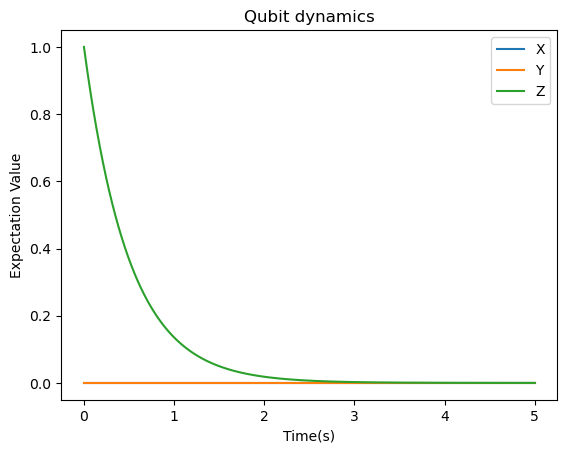

In [61]:
states1 = result.states

e_ops = [sigmax(),sigmay(),sigmaz()]
r = mesolve(H, psi_ini1, tlist1,c_ops,e_ops)
plt.plot(tlist1, r.expect[0])
plt.plot(tlist1, r.expect[1])
plt.plot(tlist1, r.expect[2])
plt.legend(("X","Y","Z"))
plt.xlabel("Time(s)")
plt.ylabel("Expectation Value")
plt.title("Qubit dynamics")

Text(0.5, 1.0, 'Fidelity of Single Qubit with Stochastic X Error')

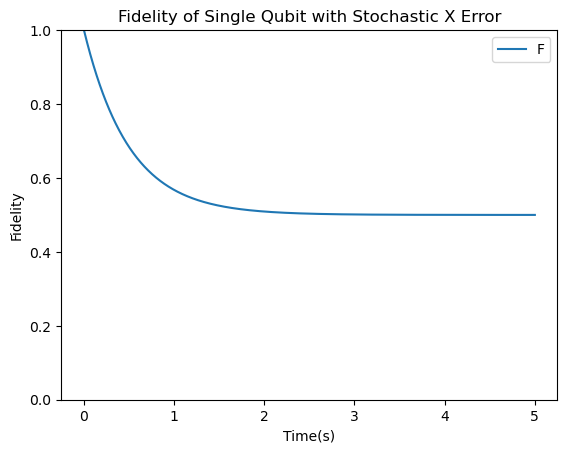

In [62]:
plt.plot(tlist1, expect(states1,psi_ini1))
plt.ylim(0,1)
plt.legend(("F(t)"))
plt.xlabel("Time(s)")
plt.ylabel("Fidelity")
plt.title("Fidelity of Single Qubit with Stochastic X Error")

## 1.2 3-qubit fidelity

In [63]:
psi_ini2 = tensor(basis(2,0),basis(2,0),basis(2,0))
tlist2 = np.linspace(0,5,1000)
c_ops = [tensor(sigmax(),qeye(2),qeye(2)),tensor(qeye(2),sigmax(),qeye(2)),tensor(qeye(2),qeye(2),sigmax())]
H = tensor(qeye(2),qeye(2),qeye(2))

result = mesolve(H, psi_ini2, tlist2,c_ops)
states2 = result.states

Text(0.5, 1.0, 'Fidelity of Three Qubits each with Stochastic X Errors')

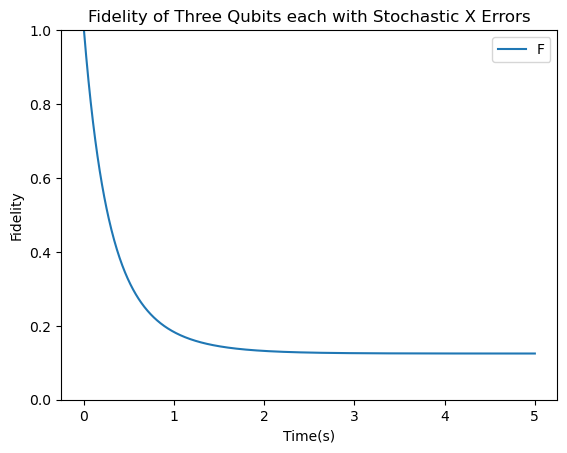

In [64]:
plt.plot(tlist2, expect(states2,psi_ini2))
plt.ylim(0,1)
plt.legend(("F(t)"))
plt.xlabel("Time(s)")
plt.ylabel("Fidelity")
plt.title("Fidelity of Three Qubits each with Stochastic X Errors")

## 1.3 Stabilizer Measurement

Text(0.5, 1.0, 'Fidelity of Three Error-Corrected Qubits each with Stochastic X Errors')

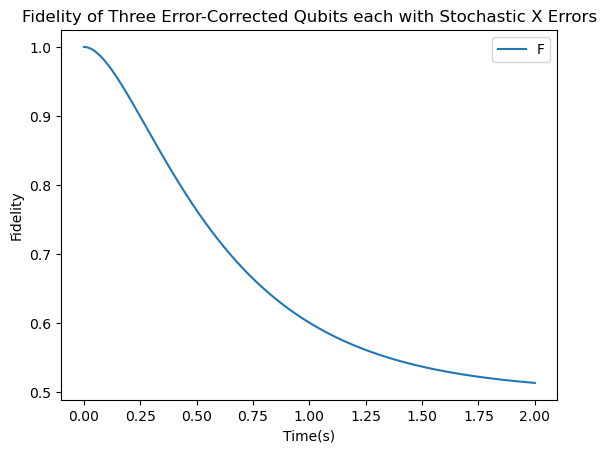

In [65]:
def errorcorrection(t):
    psi_ini = tensor(basis(2,0),basis(2,0),basis(2,0))
    t_list = np.linspace(0,t,1000)
    c_ops = [tensor(sigmax(),qeye(2),qeye(2)),tensor(qeye(2),sigmax(),qeye(2)),tensor(qeye(2),qeye(2),sigmax())]
    H = tensor(qeye(2),qeye(2),qeye(2))
    result = mesolve(H, psi_ini, t_list,c_ops)

    fin_state = result.states[-1]

    #operators to fix errors
    r0 = ket2dm(tensor(basis(2,0),basis(2,0),basis(2,0))) + ket2dm(tensor(basis(2,1),basis(2,1),basis(2,1)))
    r1 = r0*tensor(sigmax(),qeye(2),qeye(2))
    r2 = r0*tensor(qeye(2),sigmax(),qeye(2))
    r3 = r0*tensor(qeye(2),qeye(2),sigmax())
    
    correct = r0*fin_state*r0.dag()+r1*fin_state*r1.dag()+r2*fin_state*r2.dag()+r3*fin_state*r3.dag()
    exp=expect(correct,psi_ini)
    return exp
errcorrect = np.vectorize(errorcorrection)
    
tlist = np.linspace(0.000001,2,500) 
flist = errcorrect(tlist)
plt.plot(tlist, flist)
#plt.ylim(0,1)
plt.legend(("F(t)"))
plt.xlabel("Time(s)")
plt.ylabel("Fidelity")
plt.title("Fidelity of Three Error-Corrected Qubits each with Stochastic X Errors")

Comparison between fidelities in 1,2,3

Text(0.5, 1.0, 'Fidelity from first three problems comparison')

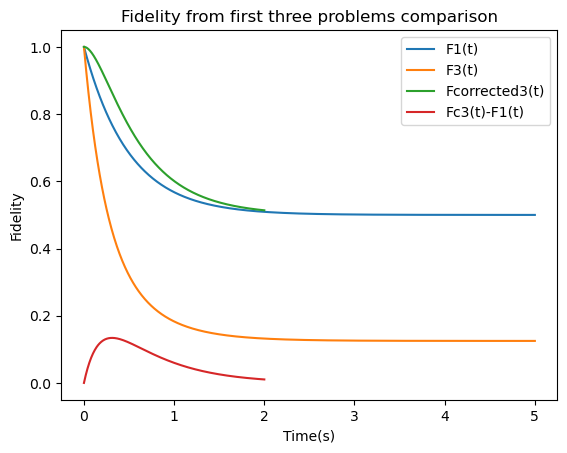

In [69]:
plt.plot(tlist1, expect(states1,psi_ini1))
plt.plot(tlist2, expect(states2,psi_ini2))
plt.plot(tlist, flist)
plt.plot(tlist,flist-expect(states1,psi_ini1)[0:500])
plt.legend(("F1(t)","F3(t)","Fcorrected3(t)","Fc3(t)-F1(t)"))
plt.xlabel("Time(s)")
plt.ylabel("Fidelity")
plt.title("Fidelity from first three problems comparison")

*************The corrected 3 error-corrected qubit fidelity is higher than both the 3 and 1 qubit uncorrected fidelities. The difference between the fidelity of the single qubit and the fidelity of the 3 error-corrected qubits is also graphed showing growth until around 0.3s and then falling off until both reach a fidelity of 0.5.

## 1.4 1 Qubit X State

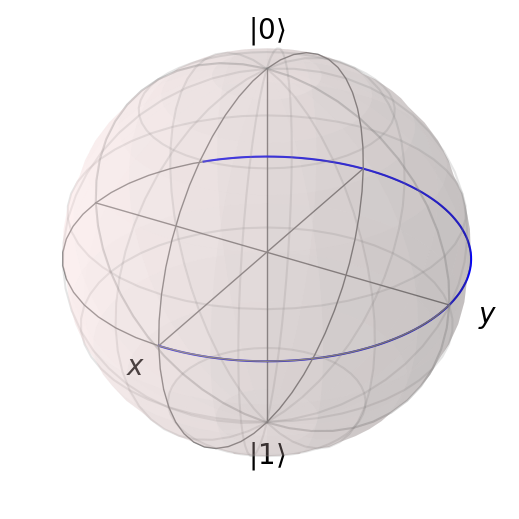

1.5715715715715715


-0.9999999999984104

In [10]:
psi_ini = (basis(2,0)+basis(2,1)).unit()
H = sigmaz()
# sesolve(H, psi0, tlist, e_ops=None)
t_list = np.linspace(0,2,1000)
t_list_adj = [0,np.pi/2]
e_ops = [sigmax(), sigmay(), sigmaz()]
result = sesolve(H, psi_ini, t_list,e_ops)
result2=sesolve(H, psi_ini, t_list_adj,e_ops)
b=Bloch()
b.add_points(result.expect,meth='l')
b.show()
#find where X expectation value is 1
for t in range(0,1000):
    if abs(result.expect[0][t]+1)<0.000002:
        print(t_list[t])
        
result2.expect[0][1]

The state reaches |-X> at t=pi/2. Now introduce a stochastic X error

Text(0.5, 1.0, 'Fidelity of the qubit with -X state with Stochastic X Errors with varied kappa')

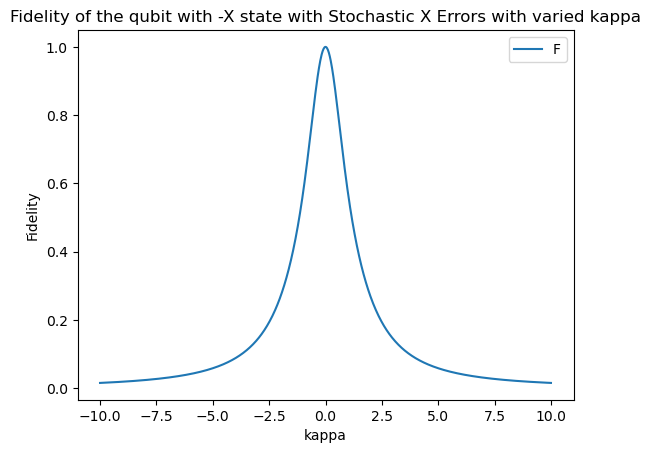

In [13]:
def kappa_help(k):
    psi_ini = (basis(2,0)+basis(2,1)).unit()
    psi_f = (basis(2,0)-basis(2,1)).unit()
    H = sigmaz()
    t_list = [0,np.pi/2]
    c_ops = k*sigmax()
    result = mesolve(H, psi_ini, t_list,c_ops)
    states = result.states
    return expect(states,psi_f)[1]
veckappa = np.vectorize(kappa_help)

kappa_list = np.linspace(-10,10,1000)
x_expect = veckappa(kappa_list)
plt.plot(kappa_list,x_expect)
plt.legend(("F(t)"))
plt.xlabel("kappa")
plt.ylabel("Fidelity")
plt.title("Fidelity of the qubit with -X state with Stochastic X Errors with varied kappa")

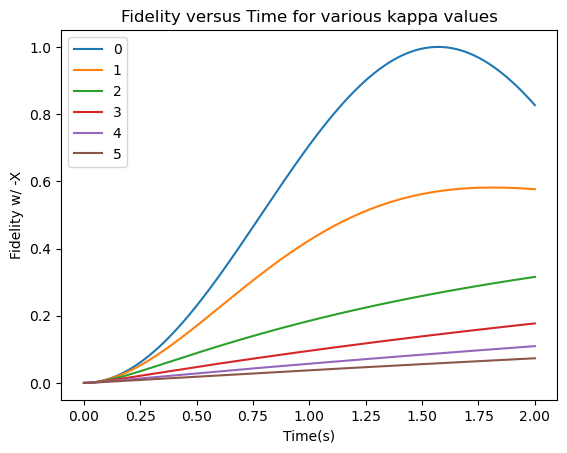

In [16]:
kappas = np.linspace(0,5,6)
tlist = np.linspace(0,2,1000)
psi_ini = (basis(2,0)+basis(2,1)).unit()
psi_f = (basis(2,0)-basis(2,1)).unit()
H = sigmaz()

for k in kappas:
    c_ops = k*sigmax()
    result = mesolve(H, psi_ini, tlist,c_ops)
    states = result.states
    plt.plot(tlist,expect(states,psi_f))
plt.title("Fidelity versus Time for various kappa values")
plt.xlabel("Time(s)")
plt.ylabel("Fidelity w/ -X")
plt.legend(("0","1","2","3","4","5"))

## 1.5 3 Qubit X States

Text(0.5, 1.0, 'Fidelity of the qubit(s) with -X state with Stochastic X Errors with varied kappa')

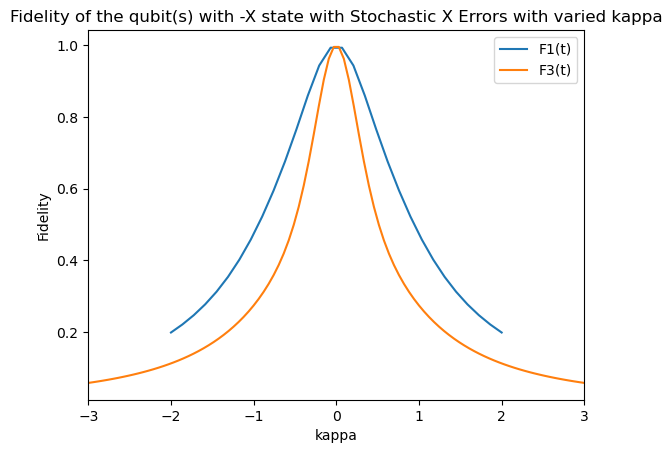

In [81]:
#without recovery
def kappa_help(k):
    psi_ini = (tensor(basis(2,0),basis(2,0),basis(2,0))+tensor(basis(2,1),basis(2,1),basis(2,1))).unit()
    psi_f = (tensor(basis(2,0),basis(2,0),basis(2,0))-tensor(basis(2,1),basis(2,1),basis(2,1))).unit()
    H = (tensor(sigmaz(),qeye(2),qeye(2))+tensor(qeye(2),sigmaz(),qeye(2))+tensor(qeye(2),qeye(2),sigmaz()))/3
    t_list = [0,np.pi/2]
    c_ops = k*tensor(sigmax(),qeye(2),qeye(2))+k*tensor(qeye(2),sigmax(),qeye(2))+k*tensor(qeye(2),qeye(2),sigmax())
    result = mesolve(H, psi_ini, t_list,c_ops)
    states = result.states
    return expect(states,psi_f)[1]
veckappa = np.vectorize(kappa_help)


kappa_list2 = np.linspace(-3,3,100)
x_expect2 = veckappa(kappa_list2)
plt.plot(kappa_list,x_expect)
plt.plot(kappa_list2,x_expect2)
plt.legend(("F1(t)","F3(t)"))
plt.xlim(-3,3)
plt.xlabel("kappa")
plt.ylabel("Fidelity")
plt.title("Fidelity of the qubit(s) with -X state with Stochastic X Errors with varied kappa")

The fidelity drops off faster for the 3 qubits than for the single qubit.

Text(0.5, 1.0, 'Fidelity of the 3 error-corrected qubits with -X state with Stochastic X Errors with varied kappa')

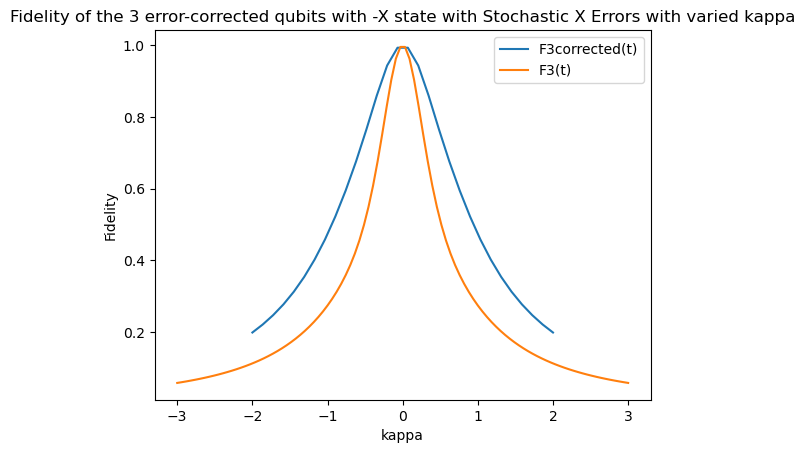

In [70]:
def errorcorrection(k):
    psi_ini = (tensor(basis(2,0),basis(2,0),basis(2,0))+tensor(basis(2,1),basis(2,1),basis(2,1))).unit()
    psi_f = (tensor(basis(2,0),basis(2,0),basis(2,0))-tensor(basis(2,1),basis(2,1),basis(2,1))).unit()
    t_list = [0,np.pi/2]
    c_ops = k*tensor(sigmax(),qeye(2),qeye(2))+k*tensor(qeye(2),sigmax(),qeye(2))+k*tensor(qeye(2),qeye(2),sigmax())
    H = (tensor(sigmaz(),qeye(2),qeye(2))+tensor(qeye(2),sigmaz(),qeye(2))+tensor(qeye(2),qeye(2),sigmaz()))/3
    result = mesolve(H, psi_ini, t_list,c_ops)

    fin_state = result.states[-1]
    

    #operators to fix errors
    r0 = ket2dm(tensor(basis(2,0),basis(2,0),basis(2,0))) + ket2dm(tensor(basis(2,1),basis(2,1),basis(2,1)))
    r1 = r0*tensor(sigmax(),qeye(2),qeye(2))
    r2 = r0*tensor(qeye(2),sigmax(),qeye(2))
    r3 = r0*tensor(qeye(2),qeye(2),sigmax())
    
    correct = r0*fin_state*r0.dag()+r1*fin_state*r1.dag()+r2*fin_state*r2.dag()+r3*fin_state*r3.dag()
    exp=expect(correct,psi_f)
    return exp

errcorrect = np.vectorize(errorcorrection)
    
kappa_list = np.linspace(-2,2,30)
x_expect = errcorrect(kappa_list)
plt.plot(kappa_list,x_expect)
plt.plot(kappa_list2,x_expect2)
plt.legend(("F3corrected(t)","F3(t)"))
plt.xlabel("kappa")
plt.ylabel("Fidelity")
plt.title("Fidelity of the 3 error-corrected qubits with -X state with Stochastic X Errors with varied kappa")

The error correction slows the drop in fidelity as the magnitude of kappa increases.

## 2.1 Device Basics 

a) G1, G2, G3, and G4 are all positive voltage. C and R are negative. This defines a quantum dot because the dot is controlled by G1-G4 (as will be discussed below) and C is used to confine electrons so they can be used for the dot, so must therefore have the opposite sign voltage. R is the reservoir and for the electrons to flow towards it, it must be at a negative voltage.

b) G4 sets the chemical potential for the quantum dot (when it's being used as a single quantum dot)

c) drawing attached as separate file 

d) The tunneling rate is set by tuning the G3 gate

e) The Rabi frequency measured in 2b is approximately 0.33 MHz. Using $\Omega = \gamma * B_1$ we find $B_1=1.826 \mu T$. Then $B_1=\frac{\mu_0*I_{ESR}}{2*\pi*d}$ where d is 300 nm so $I_{ESR} = 2\pi*(300*10^{-9}*1.826*10^{-6}/(4\pi*10^{-7}))=2.8 \mu A$. Lastly, we can convert from current to power with $P_{ESR} = I_{ESR}^2*R_{ESR}/2=4 mW=6dBm$ This is close to the cited power in the paper of 5 dBm. 

f) The dot size is roughly 400 nm^2 (estimating from Figure 1a) so with vertical confinement of 20nm, that gives a volume of 8000 nm^3. Using the estimation of a nuclear spin density of 20 nuclear spins/nm^3, we determine the total number of nuclear spins to be $N=1.6*10^5$. This is lower than the number of nuclear spins the electrons of the GaAs model interact with.

## 2.2 Initialization 

a) The temperature was 50 mK and the dc magnetic field was 1.4 T with resonance frequency 39.14 GHz. This gives an energy scale of 4.31 meV set by the temperature ($E=k_bT$) and 25.76 meV ($E=\hbar f$). Combined, these two give energy scales between ~21-30 meV. Using the Boltzmann distribution, $p_{up}=\frac{e^{-\Delta E/k_BT}}{1+e^{-\Delta E/k_BT}}$ we can plug in 30 meV for $k_BT$ and we get $\Delta E$ from the energy of the alternating B field ($\Delta E = 28 GHz/T * B_1 * h$). This gives a very small fidelity (ran out of digits but less than 0.00000001)

b) The initialization fidelity listed in the paper is 95% which would give a 5 percent chance of electrons being in spin up state. The difference could be caused by influence from nuclear spins which are likely more impactful than the background from temperature and dc magnetic field. 

## 2.3 Readout 

a) added drawing in attachment

b) Single-shot spin readout events occured at the white line in the read section. These are around a read level of 0.1 mV.

## 2.4 Rabi Oscillations 

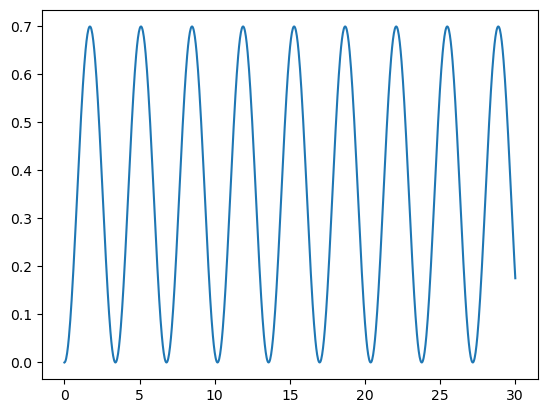

In [103]:
def rabi(d):
    x=np.linspace(0,30,1000)
    omega=1.85
    totomegasq = np.power(omega,2)+np.power(d,2)
    f=0.7*np.power(omega,2)/totomegasq*np.power(np.sin(np.sqrt(totomegasq)*x/2),2)
    return [x,f]
r=rabi(0)
plt.plot(r[0],r[1])

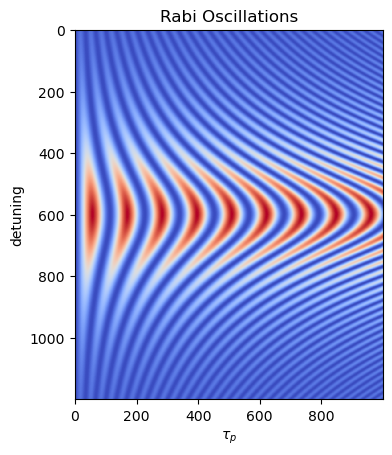

In [123]:
f=[]
for i in range(-600,600,1):
    i/=100
    fd = rabi(i)[1]
    f.append(fd)
    
plt.imshow( f , cmap = 'coolwarm' , interpolation = 'nearest' )

plt.title( "Rabi Oscillations" )
plt.xlabel(r"$\tau_p$")
plt.ylabel("detuning")

plt.show()
#cannot figure out how to relabel without just having it be the indices with this type of plot
#but the microwave burst duration ranges from 0-30 us and the detuning is from -6 to 6
#also can't get the legend but red is ~0.7 and blue is 0

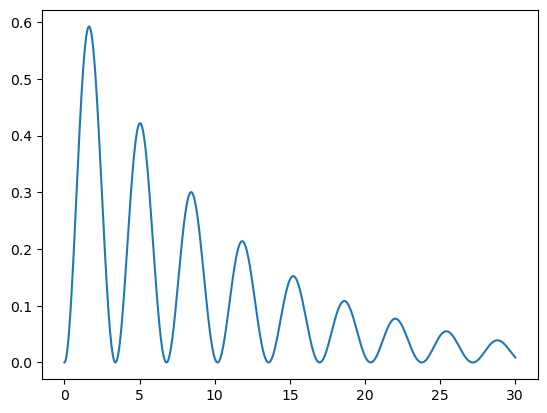

In [124]:
def rabi_decay(d):
    x=np.linspace(0,30,1000)
    omega=1.85
    totomegasq = np.power(omega,2)+np.power(d,2)
    f=0.7*np.power(omega,2)/totomegasq*np.power(np.sin(np.sqrt(totomegasq)*x/2),2)*np.exp(-x/10)
    return [x,f]
r=rabi_decay(0)
plt.plot(r[0],r[1])

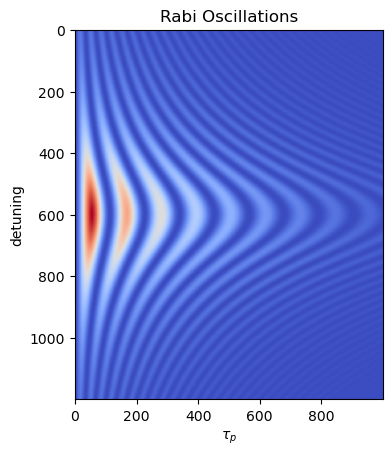

In [125]:
f=[]
for i in range(-600,600,1):
    i/=100
    fd = rabi_decay(i)[1]
    f.append(fd)
    
plt.imshow( f , cmap = 'coolwarm' , interpolation = 'nearest' )

plt.title( "Rabi Oscillations" )
plt.xlabel(r"$\tau_p$")
plt.ylabel("detuning")

plt.show()

## 2.5 Coherence Times 

a) First, microwave on resonance

Text(0.5, 0, 'time delay (us)')

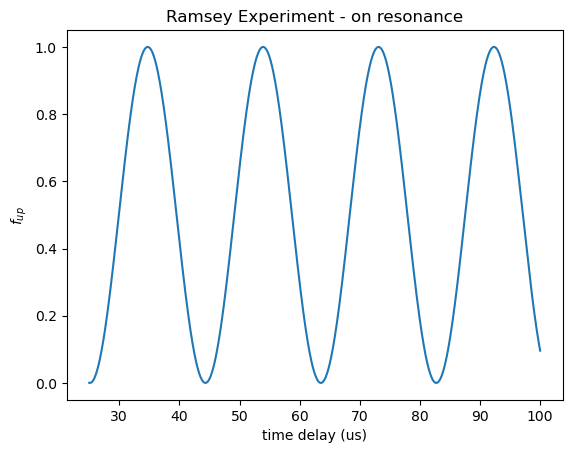

In [180]:
gamma = 28*1000*2*np.pi
h=1
By=1.86*10**-6
H = gamma*h*By/2*sigmay() 
tlist = np.linspace(0,30,500)
psi_ini = basis(2,0)
c_ops = [sigmax(),sigmay(),sigmaz()]
result = sesolve(H,psi_ini,tlist,c_ops)
zexp = result.expect[2]
#print(zexp)
#find pi/2 pulse duration, find pi pulse duration by seeing first flip to z=-1 and then half
pi2pulse = 0
for i in zexp:
    if i<-0.999:
        pi2pulse = list(zexp).index(i)/500/2*30
        break
#execute ramsey sequence (pi pulse - wait pi2pulse - pi pulse)
#find total pulse duration
def ramsey(mu):
    t_tot = pi2pulse*2+mu
    t_list = np.linspace(0,t_tot,100)
    def pulse(t,args):
        if t>pi2pulse and t<pi2pulse+25:
            return 0
        else:
            return 1
    result_pulse = sesolve([H,pulse],psi_ini,t_list,c_ops)
    #pulse_plot = [f_pi2(t,0) for t in t_list]
    return result_pulse.expect[2][-1]*0.5+0.5

ramseyvec = np.vectorize(ramsey)
mu_list = np.linspace(25,100,1000)
plt.plot(mu_list,ramseyvec(mu_list))
plt.title("Ramsey Experiment - on resonance")
plt.ylabel(r"$f_{up}$")
plt.xlabel("time delay (us)")

Now, with slight detuning:

Text(0.5, 0, 'time delay (us)')

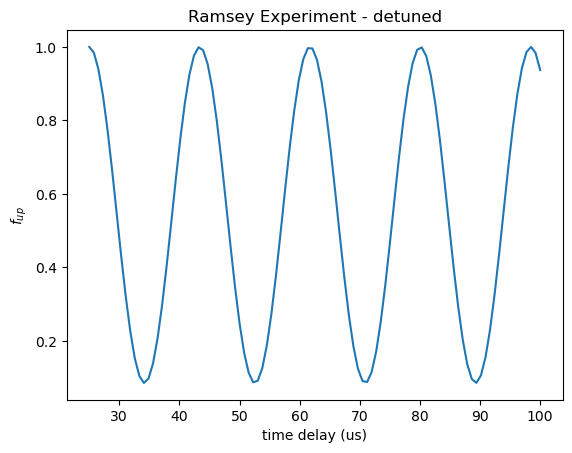

In [167]:
gamma = 28*1000*2*np.pi
h=1
By=1.86*10**-6
delta = 0.1
H = gamma*h*By/2*sigmay()+delta/2*sigmaz()
tlist = np.linspace(0,30,500)
psi_ini = basis(2,0)
c_ops = [sigmax(),sigmay(),sigmaz()]
result = sesolve(H,psi_ini,tlist,c_ops)
zexp = result.expect[2]
#print(zexp)
#find pi/2 pulse duration, find pi pulse duration by seeing first flip to z=-1 and then half
pi2pulse = 0
for i in zexp:
    if i<-0.999:
        pi2pulse = list(zexp).index(i)/500/2*30
        break
#execute ramsey sequence (pi pulse - wait pi2pulse - pi pulse)
#find total pulse duration
def ramsey2(mu):
    t_tot = pi2pulse*2+mu
    t_list = np.linspace(0,t_tot,100)
    def pulse(t,args):
        if t>pi2pulse and t<pi2pulse+25:
            return 0
        else:
            return 1
    result_pulse = sesolve([H,pulse],psi_ini,t_list,c_ops)
    #pulse_plot = [f_pi2(t,0) for t in t_list]
    return result_pulse.expect[2][-1]*0.5+0.5

ramseyvec2 = np.vectorize(ramsey2)
mu_list2 = np.linspace(0,100,100)
plt.plot(mu_list2,ramseyvec2(mu_list2))

plt.title("Ramsey Experiment - detuned")
plt.ylabel(r"$f_{up}$")
plt.xlabel("time delay (us)")
#the wave is shifted but the frequency is the same

b) Now add dephasing

Text(0.5, 0, 'time delay (us)')

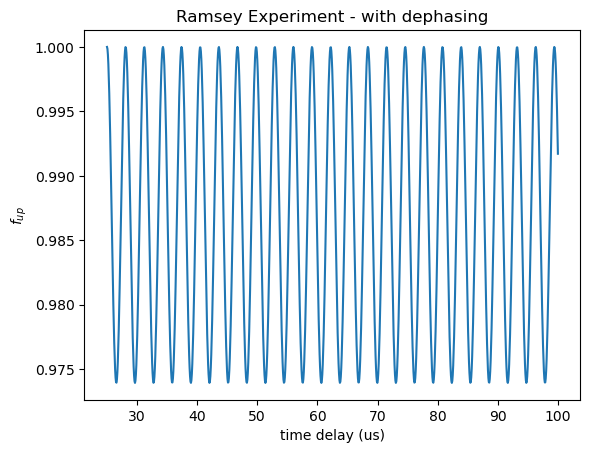

In [183]:
gamma = 28*1000*2*np.pi
h=1
By=1.86*10**-6
dephase=0.001
H = gamma*h*By/2*sigmay()+sigmaz()
tlist = np.linspace(0,30,500)
psi_ini = basis(2,0)
c_ops = [sigmax(),sigmay(),sigmaz()]
result = sesolve(H,psi_ini,tlist,c_ops)
zexp = result.expect[2]
#print(zexp)
#find pi/2 pulse duration, find pi pulse duration by seeing first flip to z=-1 and then half
pi2pulse = 0
for i in zexp:
    if i<-0.999:
        pi2pulse = list(zexp).index(i)/500/2*30
        break
#execute ramsey sequence (pi pulse - wait pi2pulse - pi pulse)
#find total pulse duration
def ramsey(mu):
    t_tot = pi2pulse*2+mu
    t_list = np.linspace(0,t_tot,100)
    def pulse(t,args):
        if t>pi2pulse and t<pi2pulse+25:
            return 0
        else:
            return 1
    result_pulse = sesolve([H,pulse],psi_ini,t_list,c_ops)
    #pulse_plot = [f_pi2(t,0) for t in t_list]
    return result_pulse.expect[2][-1]*0.5+0.5

ramseyvec = np.vectorize(ramsey)
mu_list = np.linspace(25,100,1000)
plt.plot(mu_list,ramseyvec(mu_list))
plt.title("Ramsey Experiment - with dephasing")
plt.ylabel(r"$f_{up}$")
plt.xlabel("time delay (us)")

c) The difference between 3b and 3c is that the pi-pulse in the middle of the sequence for b is repeated 500 times (with the $\tau_w/2$ breaks). This echo pulse accounts for slow drifts in the environment so increasing the number of times it is performed will improve the coherence. 